Train a CNN model using data augmentation to improve generalization.
a.	Apply data augmentation techniques like rotation, zooming, and flipping.
b.	Train the CNN on augmented data and compare performance with the original model.
c.	Plot training and validation accuracy for both models.


take the in built dataset from the libraries and perform the above steps on the dataset, write the cell by cell code properly 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 19s 0us/step


In [3]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
# Create and train the original model
model_original = create_cnn_model()
history_original = model_original.fit(x_train, y_train_cat,
                                      epochs=10,
                                      batch_size=64,
                                      validation_data=(x_test, y_test_cat))


Epoch 1/10
782/782 [==============================] - 17s 20ms/step - loss: 1.5704 - accuracy: 0.4260 - val_loss: 1.3224 - val_accuracy: 0.5222
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 1.2259 - accuracy: 0.5648 - val_loss: 1.1173 - val_accuracy: 0.6057
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 1.0721 - accuracy: 0.6224 - val_loss: 1.0269 - val_accuracy: 0.6358
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.9763 - accuracy: 0.6582 - val_loss: 1.0046 - val_accuracy: 0.6432
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.8928 - accuracy: 0.6874 - val_loss: 0.9734 - val_accuracy: 0.6622
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.8309 - accuracy: 0.7096 - val_loss: 0.9053 - val_accuracy: 0.6857
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.7786 - accuracy: 0.7258 - val_loss: 0.8865 - val_accuracy:

In [5]:
# Define ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [6]:
# Create and train model on augmented data
model_augmented = create_cnn_model()
history_augmented = model_augmented.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                                        epochs=10,
                                        validation_data=(x_test, y_test_cat),
                                        steps_per_epoch=x_train.shape[0] // 64)


Epoch 1/10
781/781 [==============================] - 22s 27ms/step - loss: 1.6492 - accuracy: 0.3944 - val_loss: 1.3879 - val_accuracy: 0.4967
Epoch 2/10
781/781 [==============================] - 21s 27ms/step - loss: 1.3401 - accuracy: 0.5188 - val_loss: 1.2619 - val_accuracy: 0.5404
Epoch 3/10
781/781 [==============================] - 21s 27ms/step - loss: 1.2199 - accuracy: 0.5646 - val_loss: 1.1609 - val_accuracy: 0.5905
Epoch 4/10
781/781 [==============================] - 21s 27ms/step - loss: 1.1337 - accuracy: 0.5986 - val_loss: 1.0830 - val_accuracy: 0.6175
Epoch 5/10
781/781 [==============================] - 21s 27ms/step - loss: 1.0732 - accuracy: 0.6208 - val_loss: 1.0093 - val_accuracy: 0.6437
Epoch 6/10
781/781 [==============================] - 21s 26ms/step - loss: 1.0235 - accuracy: 0.6392 - val_loss: 0.9615 - val_accuracy: 0.6648
Epoch 7/10
781/781 [==============================] - 21s 26ms/step - loss: 0.9893 - accuracy: 0.6530 - val_loss: 0.9550 - val_accuracy:

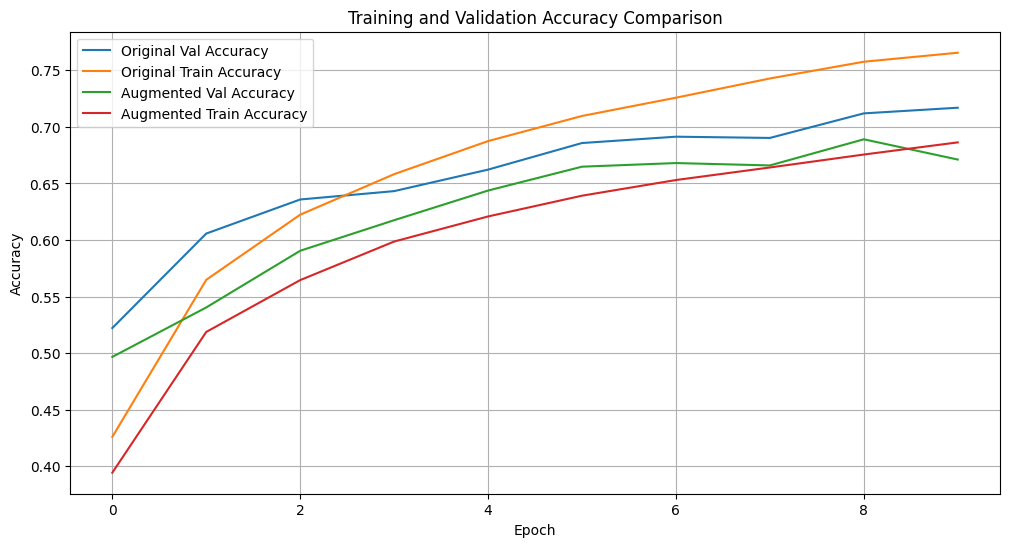

In [7]:
plt.figure(figsize=(12, 6))

# Original model
plt.plot(history_original.history['val_accuracy'], label='Original Val Accuracy')
plt.plot(history_original.history['accuracy'], label='Original Train Accuracy')

# Augmented model
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Val Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented Train Accuracy')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
